In [26]:

# New addition
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
df = pd.read_csv('cleveland.csv')
df.rename(columns={'num': 'disease'}, inplace=True)
df['disease'] = df.disease.apply(lambda x: min(x, 1))
df.loc[df['ca'] == '?', 'ca'] = None
df.loc[df['thal'] == '?', 'thal'] = None
df['ca'] = df['ca'].apply(lambda a: float(a) if (a is not None) else None)
df['thal'] = df['thal'].apply(lambda a: float(a) if (a is not None) else None)
display(df)
df.dropna().corr()
def testDataset(dataframe, testCol, k=5, attributes=1, verbose=True):
    df = dataframe.copy()

    # Test a random set of attributes
    if type(attributes) == int:
        # If more attributes are specified than there are, just use all of them
        if attributes > len(df.columns)-1:
            attributes = len(df.columns)-1
        attributes = df[df.columns[df.columns != testCol]].sample(axis=1, n=attributes).columns

    # Test a specific set of attributes
    elif type(attributes) != list:
        print('attributes must be an integer or a list of attribute names')
        return


    # Clear out any records that don't have a valid value for one of the attributes in question
    for attribute in attributes:
        if attribute == testCol:
            print(f'Cannot predict {testCol} using {testCol}')
            return
        
        try:
            df = df.dropna(subset=attribute)
        except Exception as e:
            print(e)
            return
    
    print(f'Predicting based on the {k} nearest neighbors using {attributes}:') if verbose else None
    # display(df)

    # Standardize the data
    for attribute in attributes:
        df[attribute] = (df[attribute] - df[attribute].mean()) / df[attribute].std()

    f1Scores = []
    for j in range(10):
        # Use knn. First create a nearest neighbors object.
        nn = NearestNeighbors(n_neighbors=k, metric='euclidean', algorithm='auto')
        
        X = df[attributes].values
        y = df[[testCol]].values

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=42)

        fit = nn.fit(X_train)

        distances, indices = fit.kneighbors(X_test)
        
        y_pred = []
        for i in range(len(indices)):
            nbrs = y_train[indices[i]]
            

            # Predict the class with the highest frequency among neighbors
            greatestValue = df[testCol].unique()[0]

            greatestValueCount = 0
            for value in df[testCol].unique():
                valueCount = [item for sublist in nbrs for item in sublist].count(value)

                if valueCount >= greatestValueCount:
                    greatestValueCount = valueCount
                    greatestValue = value

            # healthy = [item for sublist in nbrs for item in sublist].count(0)
            # sick = [item for sublist in nbrs for item in sublist].count(1)
            predict = greatestValue
            # print(healthy, sick, predict)

            y_pred.append(predict)
        
        (p,r,f,s) = precision_recall_fscore_support(y_test, y_pred, zero_division = 0)
        f1Scores.append(f)
        print(f'Test {j}: precision={p}, recall={r}, f-score={f}, support={s}') if verbose else None

    meanF1s = []
    for i in range(len(f1Scores[0])):
        f1Total = 0
        for score in f1Scores:
            f1Total += score[i]
        meanF1s.append(f1Total / len(f1Scores))

    print(f'Mean F1 scores: f-score={meanF1s}') if verbose else None

    f1sTotal = 0
    for f1 in meanF1s:
        f1sTotal += f1
    meanOfF1s = f1sTotal / len(meanF1s)
    meanF1s.append(meanOfF1s)

    print(f'Mean of mean F1 scores: f-score={meanF1s[-1]}') if verbose else None

    return meanF1s, attributes

age = 'age'
trestbps = 'trestbps'
chol = 'chol'
thalach = 'thalach'
cp = 'cp'
restecg = 'restecg'
# scores = {'k': [], 'scores': []}
# for k in range(1, 200):
#     scores['k'].append(k)
#     scores['scores'].append(testDataset(dataframe=df, testCol='disease', k=k, attributes=['oldpeak', 'cp'], verbose=False))

# plt.plot(scores['k'], scores['scores'])
# plt.xlabel('k')
# plt.ylabel('f score')
display(testDataset(df, 'disease', 5, ['oldpeak', 'thal', 'ca']))
testDataset(df, 'disease', 5, ['thalach', 'ca', 'thal'])
testDataset(df, 'disease', 5, ['oldpeak', 'age', 'cp'])
testDataset(df, 'disease', 5, ['slope', 'thal', 'cp'])
display(testDataset(df, 'disease', 5, [trestbps, chol,thalach,cp]))

#testDataset(df, 'disease', 5, 4)

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca  thal  disease  
0      3.0  0.0   6.0        0  
1      2.0  3.0   3.0        1  
2      2.0  2.0   7.0        1  
3      3.0  0.0   3.0        0  
4      1.0  0.0   3.0        0  
..     ...  ...   ...      ...  
298    2.0  0.0   7.0        1  
299    2.0  2.0   7.0        1  
300    2.0  1.0   7.0        1  
301    2.0  1.0   3.0        1  
302    1.0  NaN   3.0        0  

[303 rows x 14 columns]

Predicting based on the 5 nearest neighbors using ['oldpeak', 'thal', 'ca']:
Test 0: precision=[0.5862069  0.67391304], recall=[0.53125    0.72093023], f-score=[0.55737705 0.69662921], support=[32 43]
Test 1: precision=[0.725      0.77142857], recall=[0.78378378 0.71052632], f-score=[0.75324675 0.73972603], support=[37 38]
Test 2: precision=[0.83783784 0.78947368], recall=[0.79487179 0.83333333], f-score=[0.81578947 0.81081081], support=[39 36]
Test 3: precision=[0.84375    0.72093023], recall=[0.69230769 0.86111111], f-score=[0.76056338 0.78481013], support=[39 36]
Test 4: precision=[0.76470588 0.73170732], recall=[0.7027027  0.78947368], f-score=[0.73239437 0.75949367], support=[37 38]
Test 5: precision=[0.775      0.68571429], recall=[0.73809524 0.72727273], f-score=[0.75609756 0.70588235], support=[42 33]
Test 6: precision=[0.86956522 0.79310345], recall=[0.86956522 0.79310345], f-score=[0.86956522 0.79310345], support=[46 29]
Test 7: precision=[0.8 0.8], recall=[0.88888889 0.66666

([0.7663395308605129, 0.7498413188887265, 0.7580904248746196],
 ['oldpeak', 'thal', 'ca'])

Predicting based on the 5 nearest neighbors using ['thalach', 'ca', 'thal']:
Test 0: precision=[0.8372093 0.71875  ], recall=[0.8        0.76666667], f-score=[0.81818182 0.74193548], support=[45 30]
Test 1: precision=[0.76923077 0.80555556], recall=[0.81081081 0.76315789], f-score=[0.78947368 0.78378378], support=[37 38]
Test 2: precision=[0.81818182 0.83870968], recall=[0.87804878 0.76470588], f-score=[0.84705882 0.8       ], support=[41 34]
Test 3: precision=[0.73170732 0.88235294], recall=[0.88235294 0.73170732], f-score=[0.8 0.8], support=[34 41]
Test 4: precision=[0.8        0.74285714], recall=[0.7804878  0.76470588], f-score=[0.79012346 0.75362319], support=[41 34]
Test 5: precision=[0.81818182 0.77419355], recall=[0.8372093 0.75     ], f-score=[0.82758621 0.76190476], support=[43 32]
Test 6: precision=[0.78571429 0.78787879], recall=[0.825      0.74285714], f-score=[0.80487805 0.76470588], support=[40 35]
Test 7: precision=[0.81081081 0.76315789], recall=[0.76923077 0.80555556]

([0.7772425557232872, 0.7248082146160464, 0.7510253851696668],
 ['trestbps', 'chol', 'thalach', 'cp'])

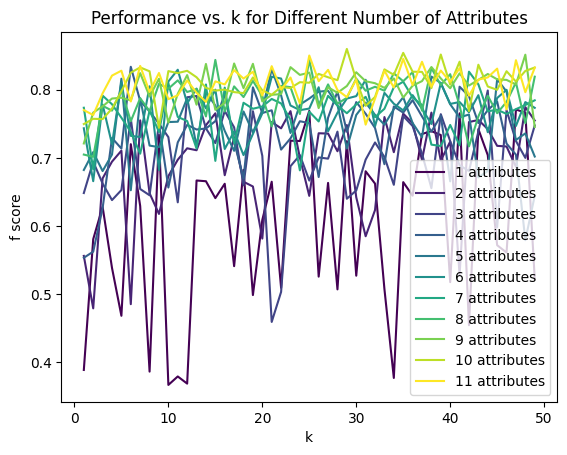

[47, 48, 44, 6, 21, 11, 42, 15, 48, 29, 25]

[0.7708716747667743,
 0.7742963950996743,
 0.7986978447596949,
 0.8334966252476959,
 0.8300168194272574,
 0.8291736198438087,
 0.8263186440190369,
 0.8436038671098292,
 0.8512325177209631,
 0.8596889401734157,
 0.8500187002952686]

[Index(['restecg'], dtype='object'),
 Index(['age', 'thal'], dtype='object'),
 Index(['exang', 'thal', 'age'], dtype='object'),
 Index(['sex', 'chol', 'restecg', 'exang'], dtype='object'),
 Index(['age', 'cp', 'slope', 'restecg', 'sex'], dtype='object'),
 Index(['slope', 'oldpeak', 'restecg', 'thal', 'chol', 'age'], dtype='object'),
 Index(['fbs', 'cp', 'thal', 'slope', 'thalach', 'chol', 'trestbps'], dtype='object'),
 Index(['slope', 'exang', 'age', 'ca', 'chol', 'cp', 'thal', 'fbs'], dtype='object'),
 Index(['exang', 'age', 'ca', 'chol', 'oldpeak', 'trestbps', 'fbs', 'slope',
        'restecg'],
       dtype='object'),
 Index(['sex', 'thal', 'fbs', 'restecg', 'ca', 'exang', 'oldpeak', 'slope',
        'chol', 'cp'],
       dtype='object'),
 Index(['ca', 'oldpeak', 'restecg', 'trestbps', 'sex', 'exang', 'chol', 'age',
        'thal', 'fbs', 'cp'],
       dtype='object')]

In [27]:
from matplotlib.cm import viridis
import numpy as np

num_attributes = 11

# Create a color map
colors = viridis(np.linspace(0, 1, num_attributes))
highestKs = []
highestFScores = []
bestAttributes = []
# Plot each curve with a different color based on the number of attributes
for j in range(1, num_attributes + 1):
    scores = {'k': [], 'scores': [], 'attributes': []}
    highestFScore = 0
    highestK = 0
    bestAttribute = []
    for k in range(1, 50):
        scores['k'].append(k)
        new_scores, randomAttributes = testDataset(dataframe=df, testCol='disease', k=k, attributes=j, verbose=False)
        scores['scores'].append(new_scores[2])

        if highestFScore < new_scores[2]:
            highestFScore = new_scores[2]
            highestK = k
            bestAttribute = randomAttributes

    # Use a different color for each curve
    plt.plot(scores['k'], scores['scores'], label=f"{j} attributes", color=colors[j-1])
    highestKs.append(highestK)
    highestFScores.append(highestFScore)
    bestAttributes.append(randomAttributes)
    



plt.xlabel('k')
plt.ylabel('f score')
plt.title('Performance vs. k for Different Number of Attributes')
plt.legend()
plt.show()


display(highestKs)
display(highestFScores)
display(bestAttributes)







In [28]:

max_value = max(highestFScores)
index_of_max = highestFScores.index(max_value)


display(testDataset(df, 'disease', highestKs[index_of_max], list(bestAttributes[index_of_max])))

Predicting based on the 29 nearest neighbors using ['sex', 'thal', 'fbs', 'restecg', 'ca', 'exang', 'oldpeak', 'slope', 'chol', 'cp']:
Test 0: precision=[0.86363636 0.87096774], recall=[0.9047619  0.81818182], f-score=[0.88372093 0.84375   ], support=[42 33]
Test 1: precision=[0.76086957 0.93103448], recall=[0.94594595 0.71052632], f-score=[0.84337349 0.80597015], support=[37 38]
Test 2: precision=[0.8        0.93333333], recall=[0.94736842 0.75675676], f-score=[0.86746988 0.8358209 ], support=[38 37]
Test 3: precision=[0.88636364 0.83870968], recall=[0.88636364 0.83870968], f-score=[0.88636364 0.83870968], support=[44 31]
Test 4: precision=[0.77777778 0.84615385], recall=[0.82352941 0.80487805], f-score=[0.8   0.825], support=[34 41]
Test 5: precision=[0.76595745 0.82142857], recall=[0.87804878 0.67647059], f-score=[0.81818182 0.74193548], support=[41 34]
Test 6: precision=[0.77777778 0.8       ], recall=[0.85365854 0.70588235], f-score=[0.81395349 0.75      ], support=[41 34]
Test 7:

([0.8518683814019967, 0.8050286735166973, 0.8284485274593469],
 ['sex',
  'thal',
  'fbs',
  'restecg',
  'ca',
  'exang',
  'oldpeak',
  'slope',
  'chol',
  'cp'])